<a href="https://colab.research.google.com/github/Aman78695/CardioVascular-Risk-Prediction/blob/main/Copy_of_CardioVascular_Risk_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title:-CardioVascular Risk Prediction

**Introduction:**

Predicting coronary heart disease in advance helps raise awareness for the disease. Preventive measurements like changing diet plans and exercise can slow down the progression of CHD. Early prediction can result in early diagnosis. So, we can treat the disease at an early stage and avoid more invasive treatment.

**Problem Statement:**

The goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

**Data Description:**

The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioural, and medical risk factors

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient

**Behavioral:**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day

**Medical(History):**

• BP Meds: whether or not the patient was on blood pressure medication

• Prevalent Stroke: whether or not the patient had previously had a stroke

• Prevalent Hyp: whether or not the patient was hypertensive

• Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)

• Tot Chol: total cholesterol level

• Sys BP: systolic blood pressure

• Dia BP: diastolic blood pressure

• BMI: Body Mass Index

• Heart Rate: heart rate

• Glucose: glucose level

• CHD: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.linear_model import LogisticRegression
from sklearn .preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
#reading csv file and converting into dataframe
df=pd.read_csv('/content/data_cardiovascular_risk.csv')

In [3]:
#checking first five rows of data
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
#checking the no. of rows and columns in the dataframe
df.shape

(3390, 17)

There are 3390 rows and 17 columns in the datasets

In [5]:
#collecting information about datasets i.e. shape of datasets,name of features,null values in column,datatype of the elements in datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
#checking null values columnwise
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
#creating a copy of original dataframe
df1=df.copy()

In [9]:
#dropping irrelevant features like id and education from dataframe
df1.drop(columns='id',axis=1,inplace=True)

In [10]:
df1.drop(columns='education',axis=1,inplace=True)

In [11]:
#converting 'YES' to 1 and 'NO' to 0 in is_smoking column
df1['is_smoking']=np.where(df1['is_smoking']=='YES',1,0)


In [12]:
#converting 'F' to 0 and 'M' to 1
df1['sex']=np.where(df1['sex']=='F',0,1)

In [13]:
df1.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#Checking and Treating Null Values

In [14]:
#creating the list of columns
total_columns=list(df1.columns)

In [15]:
#creating the list of those columns which has the null values
columns_null_values=[i for i in total_columns if df1[i].isnull().sum()!=0]
columns_null_values

['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

Now columns_null_values contain those columns which have the null values these null values has to be treated either by filling it up with mean,median,mode or 0 ,the corresponding rows can also be dropped but this can only be decided based on the business problem and going through the distribution plot of each columns.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

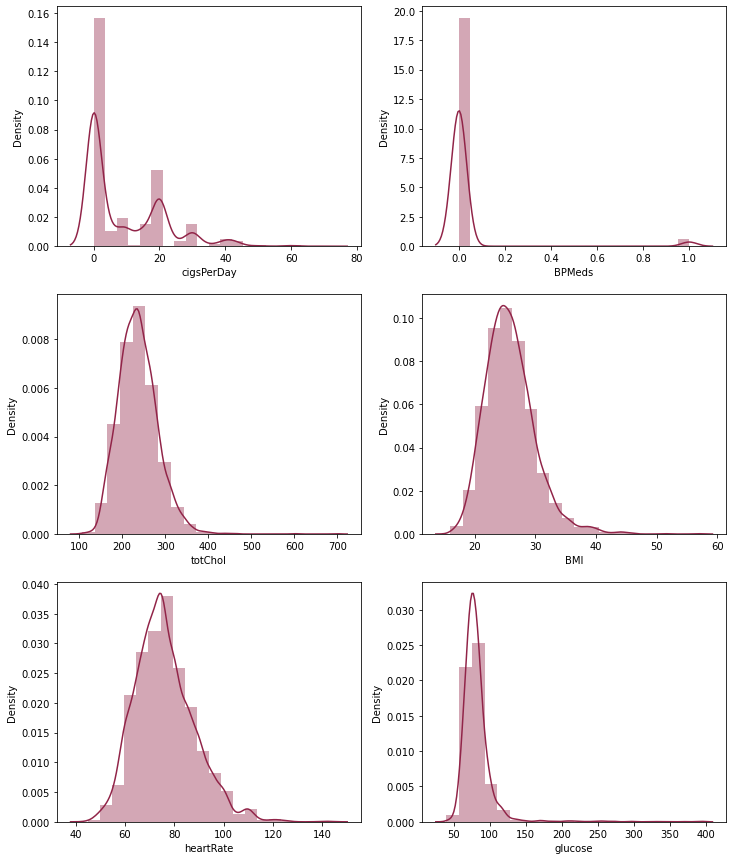

In [16]:
#plotting the distribution plot for those columns which have the null values
plt.figure(figsize=(12,15))
for i,j in enumerate(columns_null_values):
  sns.set_palette('gist_stern')
  plt.subplot(3,2,i+1)
  sns.distplot(df1[j],bins=20)
  

In [17]:
#calculating the skewness values for those columns which have null values
for i in columns_null_values:
 print(f"the skewness of the column",i,"is:","  " ,df1[i].skew())

the skewness of the column cigsPerDay is:    1.2230053709053774
the skewness of the column BPMeds is:    5.524325007968017
the skewness of the column totChol is:    0.9406357047700903
the skewness of the column BMI is:    1.0222520011438563
the skewness of the column heartRate is:    0.6764897223370003
the skewness of the column glucose is:    6.1443896544049394


**Skewness** is used to measure the level of asymmetry in our graph. It is the measure of asymmetry that occurs when our data deviates from the norm. 

If skewness value is between:

-0.5 and 0.5, the distribution of the value is almost symmetrical

-1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed. The skewness is moderate.

If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.

#filling the null values with median as most of the columns with null values are rightly skewed.

In [18]:
#creating copy of the original dataframe
df2=df1.copy()

In [19]:
#filling the null values with median
for i in columns_null_values:
 df2[i].fillna(df2[i].median(),inplace=True)

In [20]:
#cheking the null values
df2.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

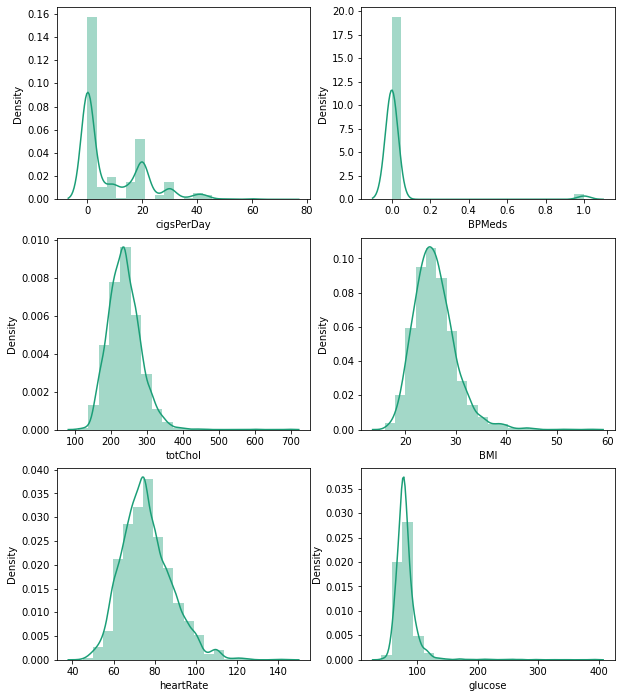

In [21]:
#plotting the dist plot of the columns after filling the null values
plt.figure(figsize=(10,12))
for i,j in enumerate(columns_null_values):
  sns.set_palette('Dark2')
  plt.subplot(3,2,i+1)
  sns.distplot(df2[j],bins=20)
  
  

In [22]:
#calculating the skewness values for those columns which was having null values after filling the null values
for i in columns_null_values:
 print(f"the skewness of the column",i,"is:","  " ,df2[i].skew())

the skewness of the column cigsPerDay is:    1.232049026922511
the skewness of the column BPMeds is:    5.563972386285764
the skewness of the column totChol is:    0.9481697283287832
the skewness of the column BMI is:    1.0255512647527518
the skewness of the column heartRate is:    0.6766595704100932
the skewness of the column glucose is:    6.462107922831296


we can clearly see the skewness of the data has increased a little bit after filling the null values but its ok we can treat it during outliers treatment.

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int64  
 2   is_smoking       3390 non-null   int64  
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 397.4 KB


#Detecting Outliers through boxplot,distplot,and violinplot.

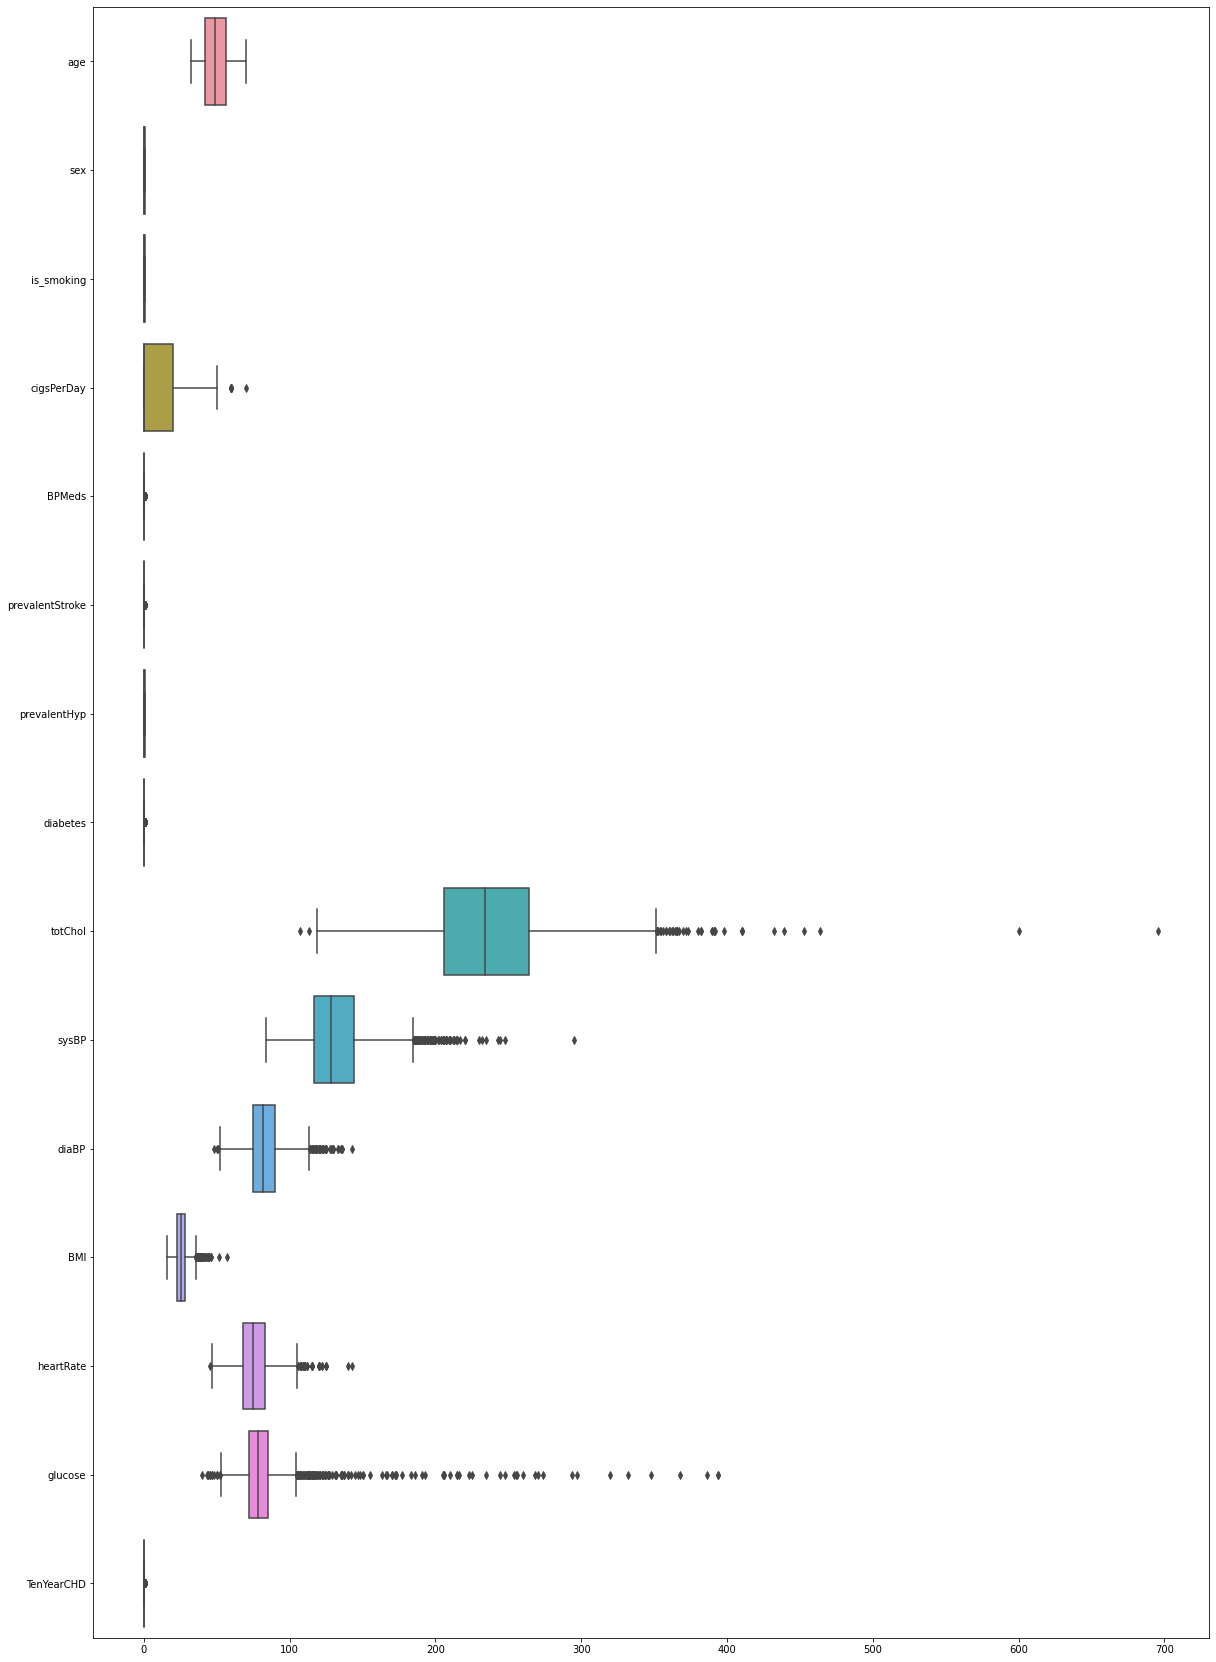

In [24]:
#plotting the boxplot for checking the outliers
plt.figure(figsize=(20,30))
sns.boxplot(data=df2,orient='h')

We can clearly see through the boxplot that there are some columns which have value either 0 or 1 hence depicting no outliers like 'TenYearCHD', 'diabetes',
'	prevalentHyp', 'prevalentStroke', 'BPMeds', 'is_smoking', 'sex,.

In [25]:
df2.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [26]:
df2['sex'].value_counts()

0    1923
1    1467
Name: sex, dtype: int64

In [27]:
df2['is_smoking'].value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

In [28]:
df2['BPMeds'].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [29]:
df2['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [30]:
df2['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

In [31]:
df2['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

We can clearly observe that the value counts of some of the columns are imbalance hence it can affect our model so it is better to drop these columns.

In [32]:
for i in total_columns:
  print(f"the skewness of the column",i,"is:","  " ,df2[i].skew())
 

the skewness of the column age is:    0.2257958756715891
the skewness of the column sex is:    0.2716141401804689
the skewness of the column is_smoking is:    0.009443812355374623
the skewness of the column cigsPerDay is:    1.232049026922511
the skewness of the column BPMeds is:    5.563972386285764
the skewness of the column prevalentStroke is:    12.297612002671828
the skewness of the column prevalentHyp is:    0.7951885864720627
the skewness of the column diabetes is:    6.001977441386289
the skewness of the column totChol is:    0.9481697283287832
the skewness of the column sysBP is:    1.1758367309612197
the skewness of the column diaBP is:    0.7181726683579213
the skewness of the column BMI is:    1.0255512647527518
the skewness of the column heartRate is:    0.6766595704100932
the skewness of the column glucose is:    6.462107922831296
the skewness of the column TenYearCHD is:    1.953181703698407


We can clearly see from the skew value that column  'sex', 'is_smoking','BPMeds','PrevelantStroke','PrevalentHyp','diabetes' has some value of skewness but these columns contain only two values 0 or 1 so these columns need not be treated for outliers.

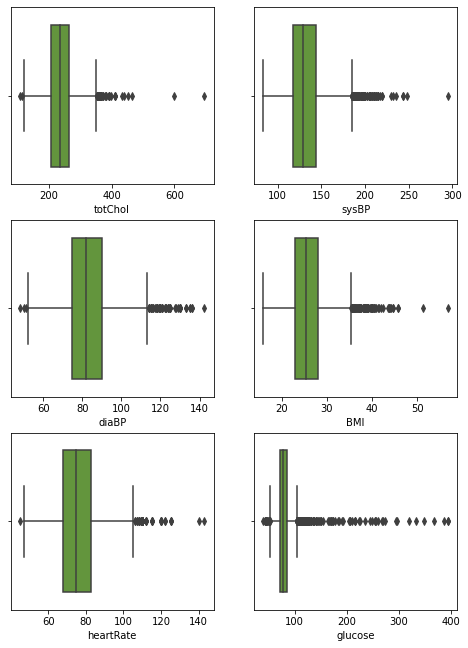

In [33]:
#plotting the boxplot for those columns whioch have continuous values indicating the outliers.
skewed_column1=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
plt.figure(figsize=(8,15))
for i,j in enumerate(skewed_column1):
  sns.set_palette('PiYG_r')
  plt.subplot(4,2,i+1)
  sns.boxplot(x=df2[j])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

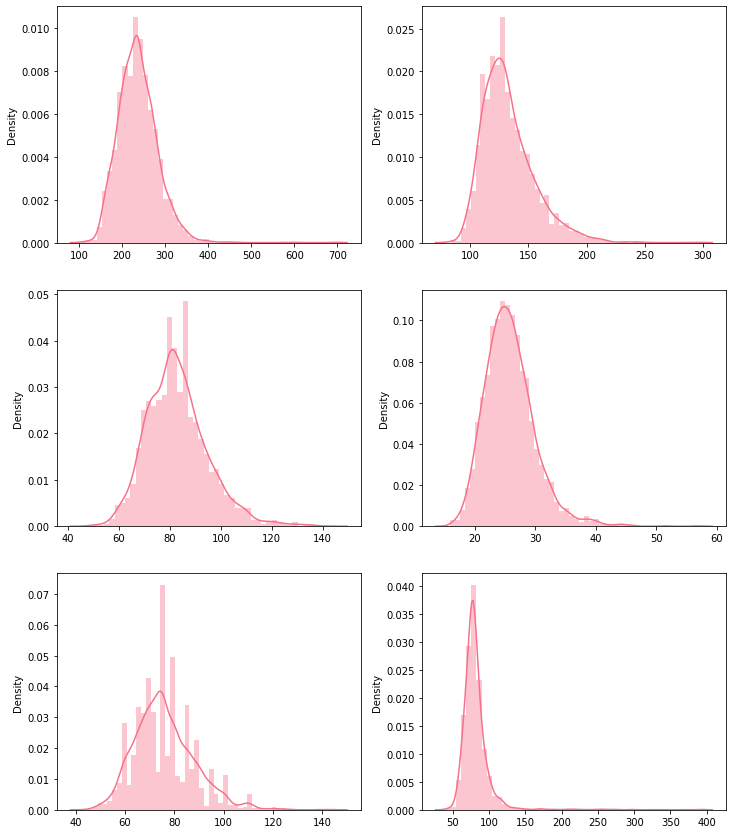

In [34]:
#plotting displot to look for skewness
skewed_column1=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
plt.figure(figsize=(12,20))
for i,j in enumerate(skewed_column1):
 sns.set_palette('husl')
 plt.subplot(4,2,i+1)
 sns.distplot(x=df2[j])
plt.show()
  

Most of the datas are rightly skewed.

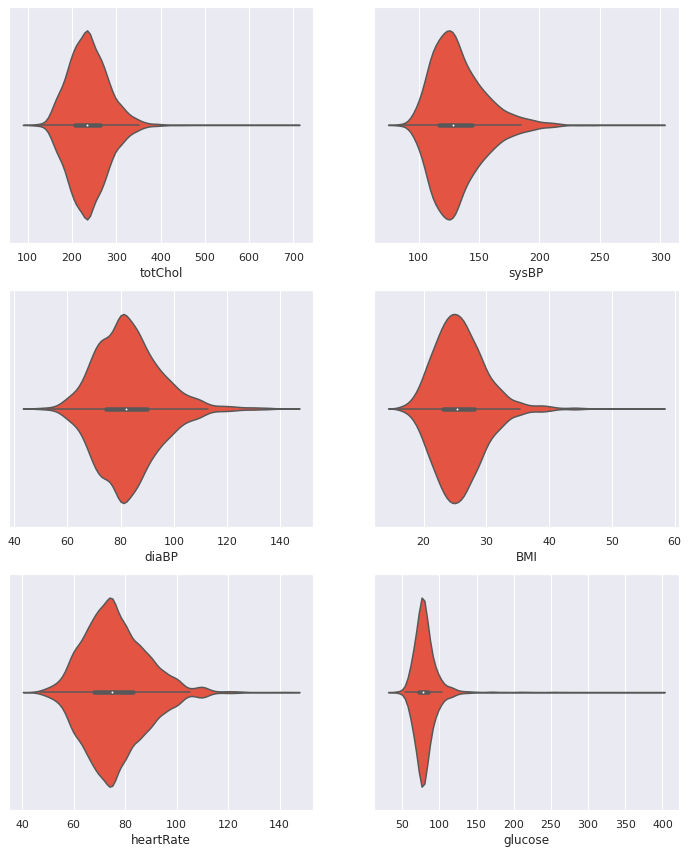

In [35]:
#drawing violinplot
skewed_column1=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
plt.figure(figsize=(12,20))
for i,j in enumerate(skewed_column1):
  sns.set()
  plt.subplot(4,2,i+1)
  sns.violinplot(x=df2[j],palette='CMRmap_r')

In general, violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:

median (a white dot on the violin plot)

interquartile range (the black bar in the center of violin)

the lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively. 

These values can be used in a simple outlier detection technique (Tukey’s fences) — observations lying outside of these “fences” can be considered outliers.




The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak.

#Explotary Data Analysis(EDA)

Lets draw heatmap to analyse the relation between variables

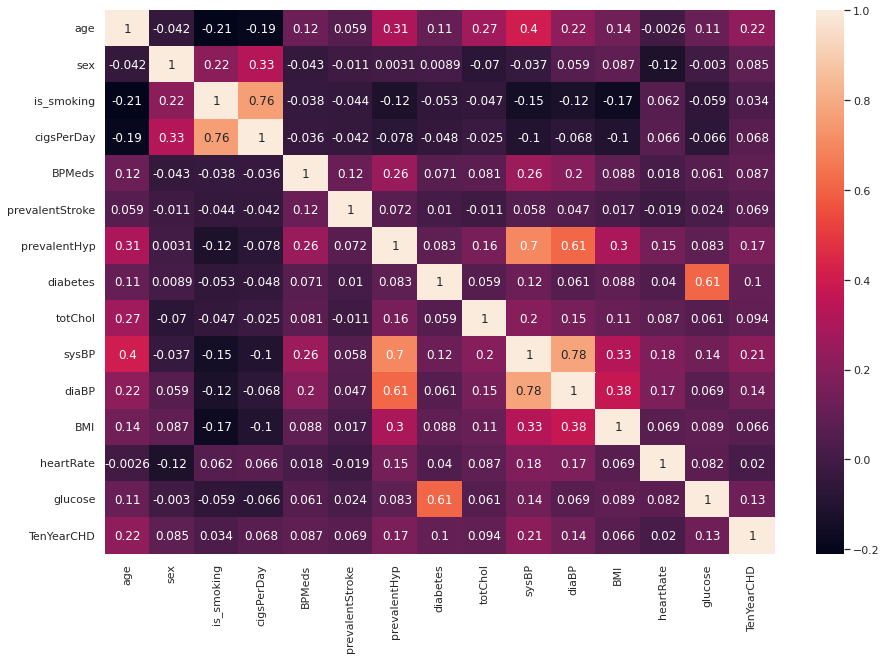

In [36]:
#plotting heatmap to observe the correlation between independent variables
plt.figure(figsize=(15,10))
sns.set_palette('OrRd_r')
sns.heatmap(df2.corr(),annot=True)

**Conclusion from Heatmap:-**

**1.sysBP and diaBP is positively correlated**

**Systolic Blood Pressure.**
The normal range of systolic blood pressure should be 90 – 120 mm Hg.

**Diastolic Blood Pressure.**
The normal range of diastolic blood pressure should be 60 – 80 mm Hg.

Both Diastolic and Systolic are derived from the Greek word. Diastolic meaning drawing apart and Systolic meaning a drawing together.

IF The systolic pressure is high	The diastolic pressure should be low.

**2.Glucose and diabetes are positively correlated.**

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high.

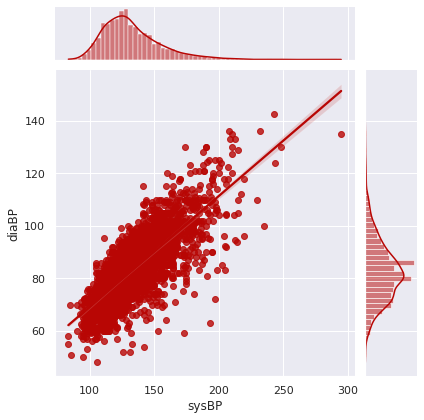

In [37]:
#Checking collinearity of diaBP and sysBP
sns.jointplot(x=df2['sysBP'],y=df2['diaBP'],kind='reg')

We can clearly see that sysBP and diaBP are positively correlated and there are many people who have higher value of sysBP and diaBP than normal range indicating more prone to chronic heart diseases.And also the value of diaBP is lower than sysBP for a particular person which is a generalised behaviour.

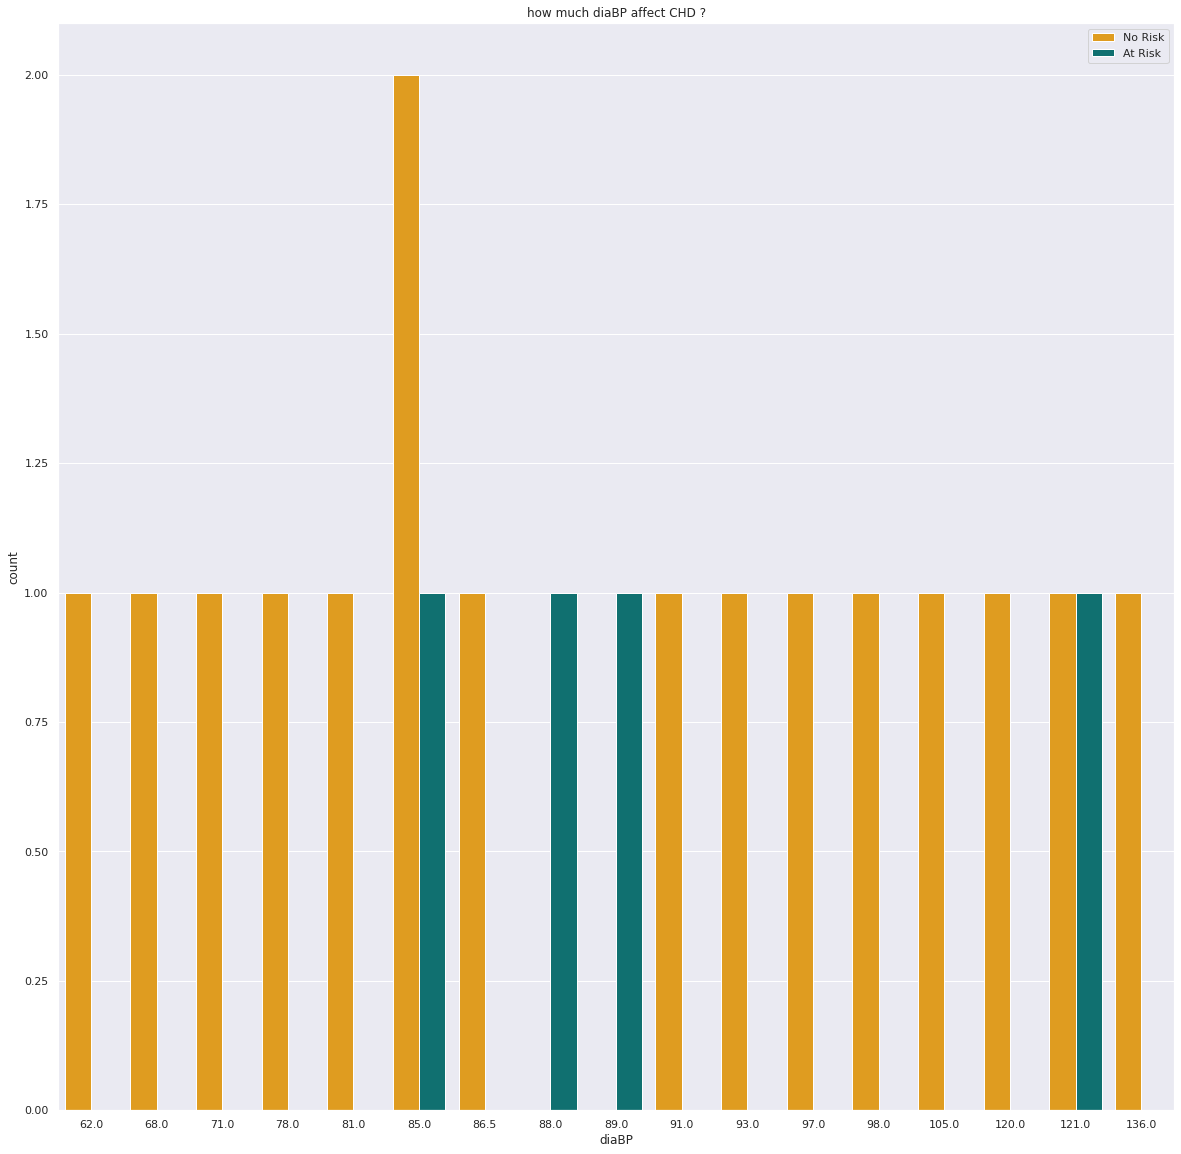

In [38]:
#countplot of first 20 samples their diaBP values and risk of CHD.
plt.figure(figsize = (20,20))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df2['diaBP'].iloc[0:20], hue= df2['TenYearCHD'].iloc[0:20],palette = my_palette)
plt.title("how much diaBP affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()
     

This countplot shows the result of first 20 samples whether they are at risk of CHD or not depending on their reading of diaBP value.

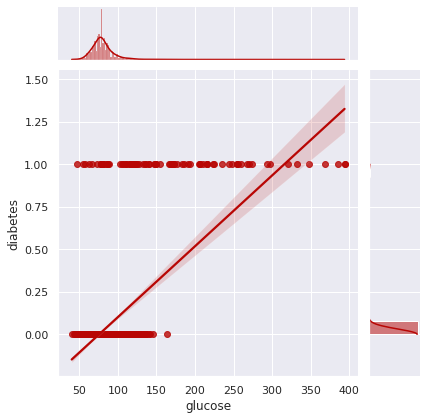

In [39]:
#checking the collinearity of diabetes and glucose level of blood
sns.jointplot(x=df2['glucose'],y=df2['diabetes'],kind='reg')

From the above plot it can be clearly interpreted that low value of glucose means non-diabetic and high value of glucose means diabetic,although there are some samples which are diabetic having low value of glucose indicting the effect of some other factors.

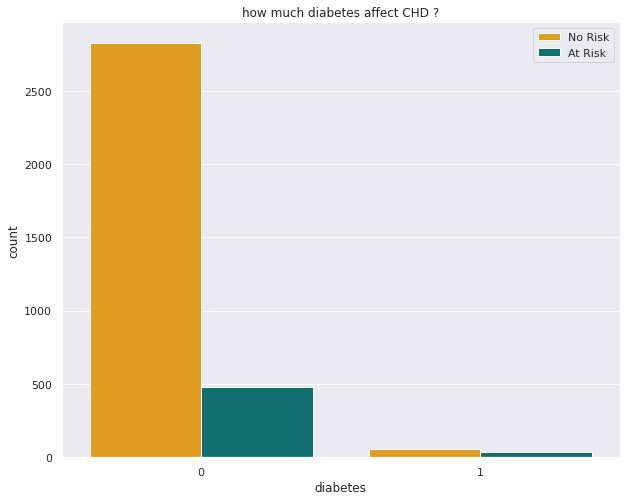

In [40]:
#counting the no. of people whether they are at risk of CHD or not given that they are diabetic or not.
plt.figure(figsize = (10,8))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df2['diabetes'], hue= df2['TenYearCHD'],palette = my_palette)
plt.title("how much diabetes affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()
     

From the above plot it can be interpreted that non-diabetic person is less prone to CHD although there are about 500 people who are non-diabetic but are at risk of CHD indicating the effect of some other factors.

<Figure size 720x576 with 0 Axes>

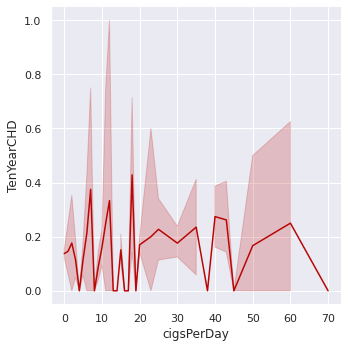

In [41]:
#variation of cigarettes per day and risk of CHD.
plt.figure(figsize=(10,8))
sns.relplot(x=df2['cigsPerDay'],y=df2['TenYearCHD'],kind='line')
sns.set_palette('Oranges')
plt.show()

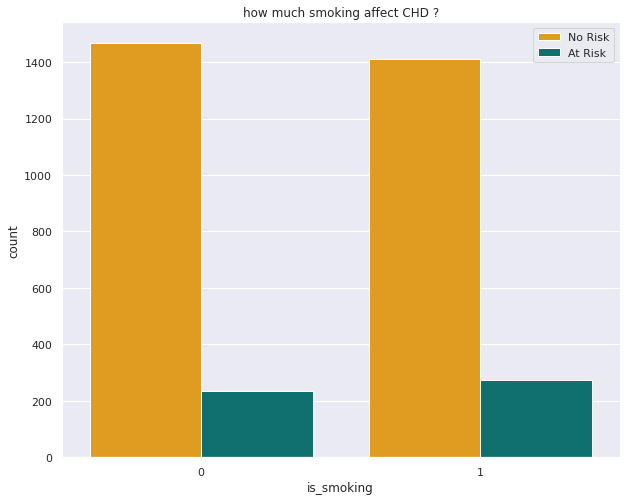

In [42]:
#counting the no of people who is at risk of CHD who is smoking and those who are not smoking.
plt.figure(figsize = (10,8))
sns.countplot(x=df2['is_smoking'],hue=df2['TenYearCHD'],palette ={0 : 'orange' , 1 : 'teal'})
plt.title("how much smoking affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

Those people who smoke and those who donot smoke are equally at high risk of heart disease.

In [43]:
df2.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


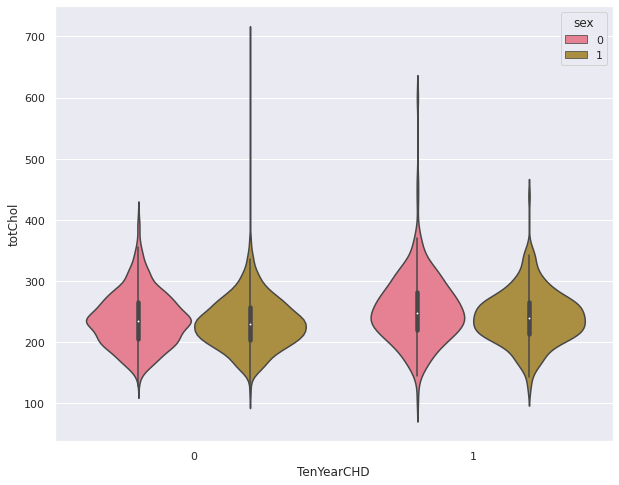

In [44]:
#plotting violinplot to detect totalcholestral of male(1) and female(0) having CHD or not
plt.figure(figsize = (10,8))
sns.set_palette('husl')
sns.violinplot(x='TenYearCHD',y='totChol',hue='sex',data=df2)

The quartile and whisker values from the boxplot are shown inside the violin.As the violin plot uses KDE,the wider portion indicates the higher density and narrow regions lower density.The interquartile range in boxplot and higher density portion in kde fall in the same region of each category of violin plot.

The above plot shows the distributionplot of TOTAL CHOLESTRAL of both male(1) and female(0) for those who are at low risk of CHD(0) and high risk of CHD(1).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


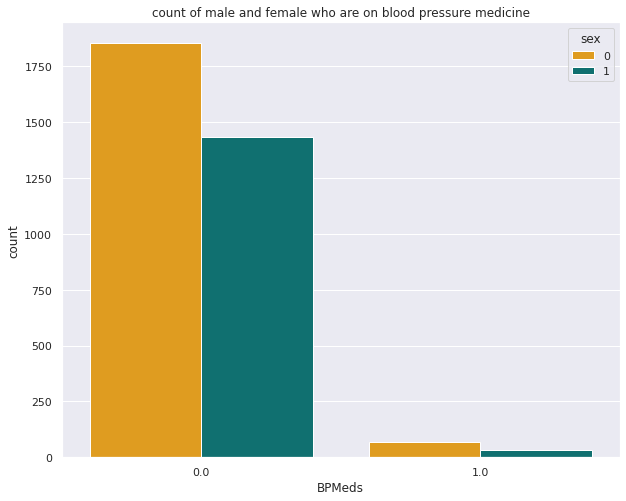

In [45]:
#counting the no of male and female who are on BP medicine
plt.figure(figsize = (10,8))
sns.countplot(df2['BPMeds'],hue=df2['sex'],palette ={0 : 'orange' , 1 : 'teal'})
plt.title('count of male and female who are on blood pressure medicine')

plt.show()

Most of the males and female are not using BPMeds

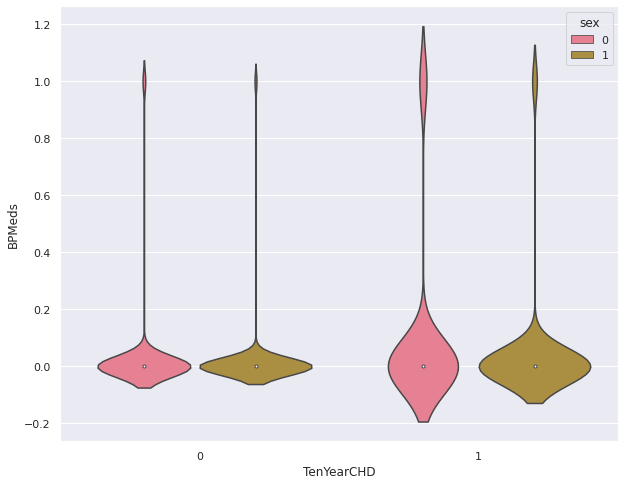

In [46]:
plt.figure(figsize = (10,8))
sns.violinplot(x='TenYearCHD',y='BPMeds',hue='sex',data=df2)

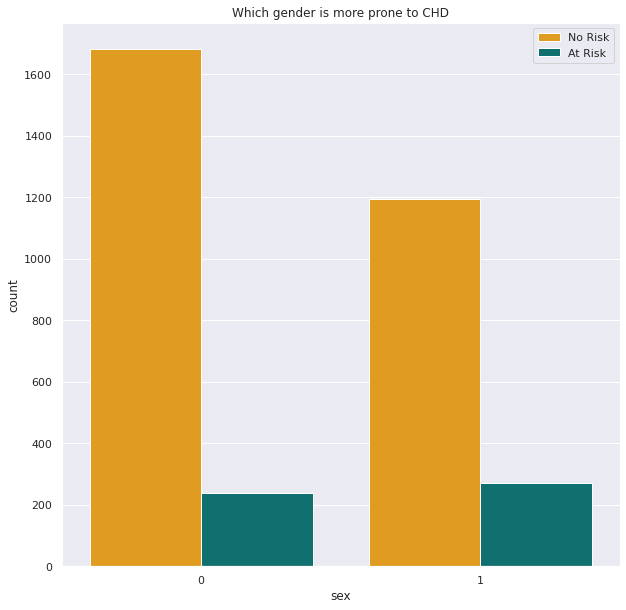

In [47]:
#counting the no of male and female who are prone to CHD
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = df2['sex'], hue = df2['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

More female are at low risk of CHD than male

**Are diabetic patients at more risk of coronary heart disease ??**

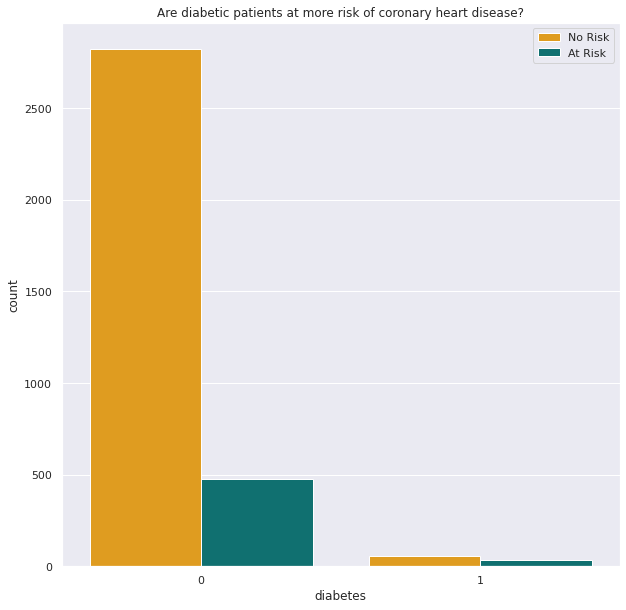

In [48]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = df2['diabetes'], hue = df2['TenYearCHD'], palette = my_palette)#counting the no of people with diabetese and whether they are prone to CHD or not
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()
     

Looking atc the plot ahead we can interpret that the non diabetic people are at low risk of heart disease but the diabetic people have almost equal proportion of beeing having heart disease.

<Figure size 1440x864 with 0 Axes>

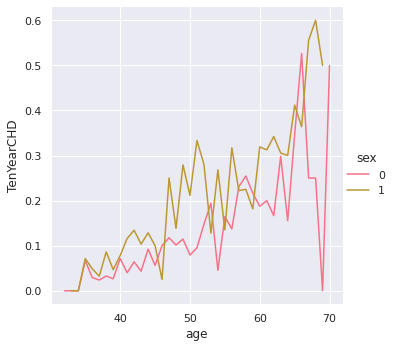

In [49]:
#relplot for age and CHD for female(0) and male(1)
plt.figure(figsize = (20,12))
sns.relplot(x="age", y="TenYearCHD", hue="sex",  kind="line", data=df2,ci=None) 

From the above relplot it can be concluded that with increase in age people are more prone to CHD and this trend is more for male than female.

<Figure size 1296x864 with 0 Axes>

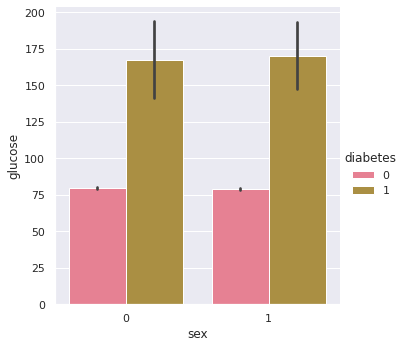

In [50]:
#checking glucose level of both male and female whether they are diabetic or not.
plt.figure(figsize = (18,12))
sns.catplot(data=df2, x="sex", y="glucose", hue="diabetes", kind="bar")

From the above plot it can be concluded that diabetic people whether male or female have higher glucose level.

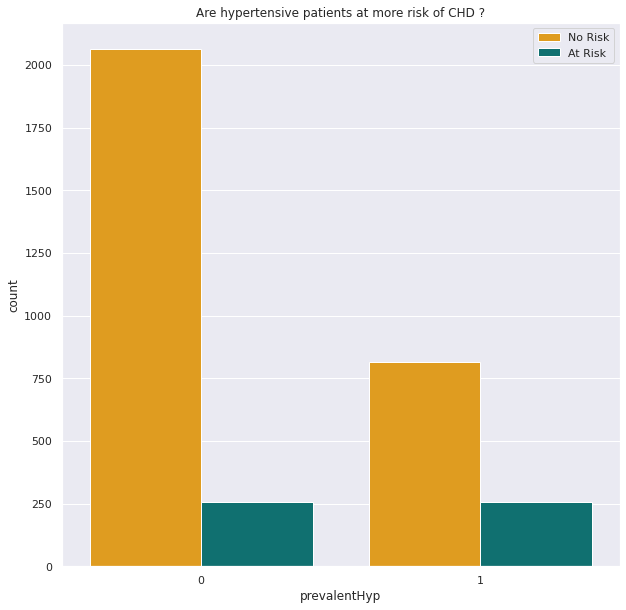

In [51]:
#checking the count of people with hypertensive and whether they are at risk of heart disease or not.
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df2['prevalentHyp'], hue = df2['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

From the above plot it can be concluded that there are more no. of people with no prevalentHyp and are low risk to heart disease.

**Are patients with blood pressure on medication at more risk of coronary heart disease ??**

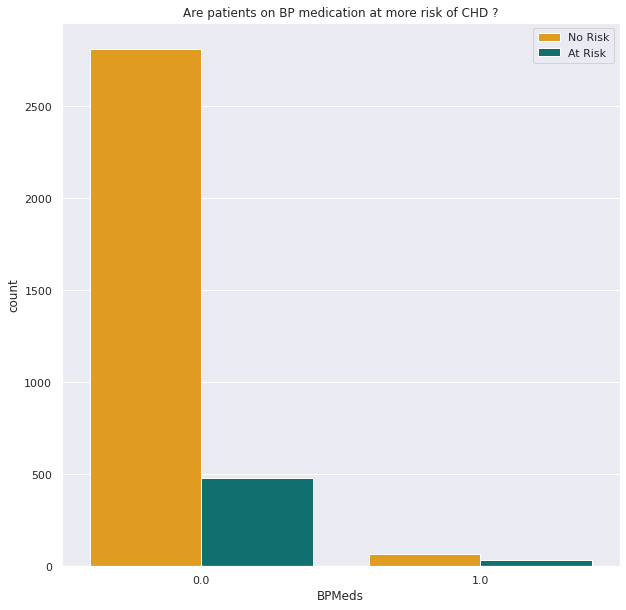

In [52]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = df2['BPMeds'], hue = df2['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Which Age group is more vulnerable to coronary heart disease ?**

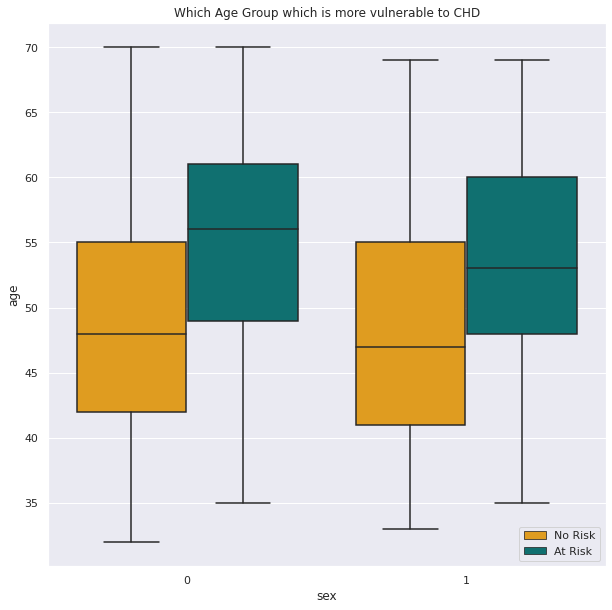

In [53]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = df2['sex'], y = df2['age'], hue = df2['TenYearCHD'], palette = my_palette)# sex '0' indicating female and '1' indicating male
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

It can be observed that whether male and female with higher age are more prone to CHD

**Are Total Cholestrol levels related to coronary heart disease ??**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


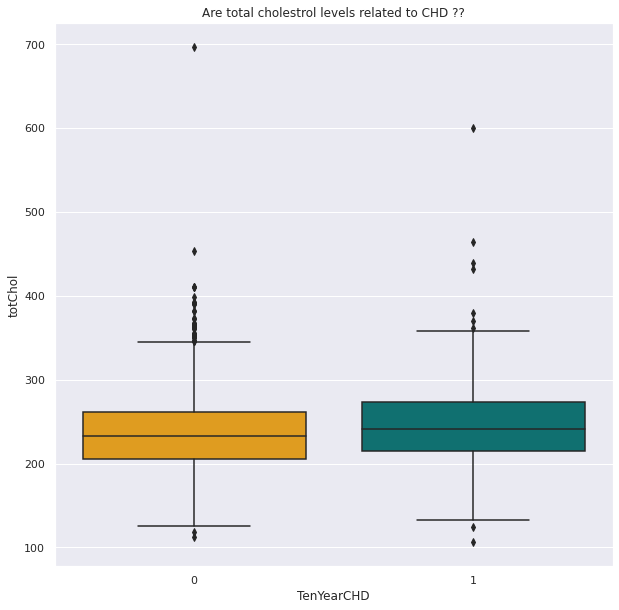

In [54]:
plt.figure(figsize = (10,10))
sns.boxplot(df2['TenYearCHD'], df2['totChol'], palette = my_palette)
plt.title("Are total cholestrol levels related to CHD ??")
plt.show()

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

**Whether a person who had a stroke earlier more prone to CHD?**

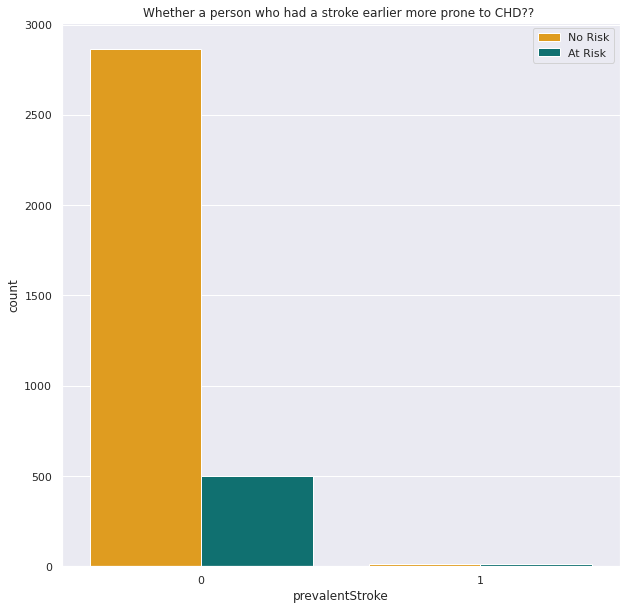

In [55]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df2['prevalentStroke'], hue = df2['TenYearCHD'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

People with no stroke history are less prone to CHD

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


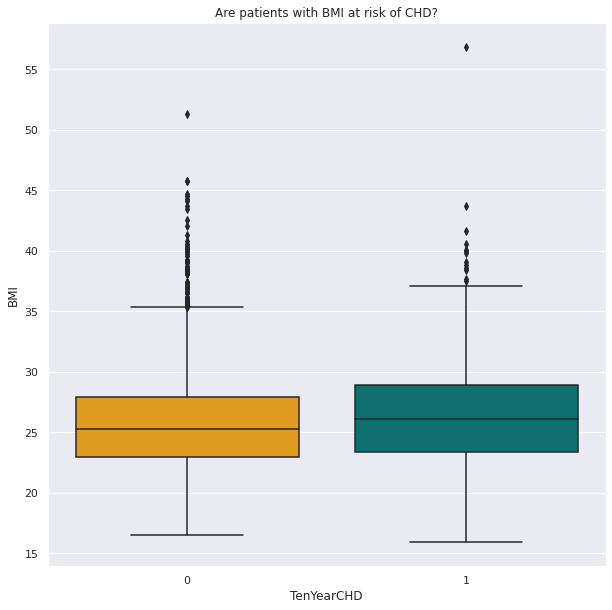

In [56]:
#Plotting boxplot for BMI
plt.figure(figsize = (10,10))
sns.boxplot(df2['TenYearCHD'], df2['BMI'], palette = my_palette)
plt.title("Are patients with BMI at risk of CHD?")
plt.show()

From the above box plot it can be observed that BMI is not a good indicator for CHD

#Outliers Treatment Using Log Transformation.

In [57]:
#creating a copy of original dataframe
df3=df2.copy()

**Checking data distribution before outliers treatment.**

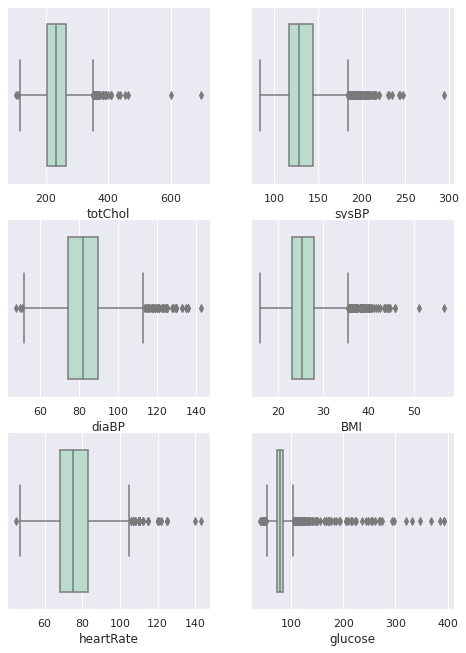

In [58]:
#plotting the boxplot for those columns whioch have continuous values indicating the outliers.
skewed_column1=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
plt.figure(figsize=(8,15))
for i,j in enumerate(skewed_column1):
  sns.set_palette('Pastel2')
  plt.subplot(4,2,i+1)
  sns.boxplot(x=df2[j])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

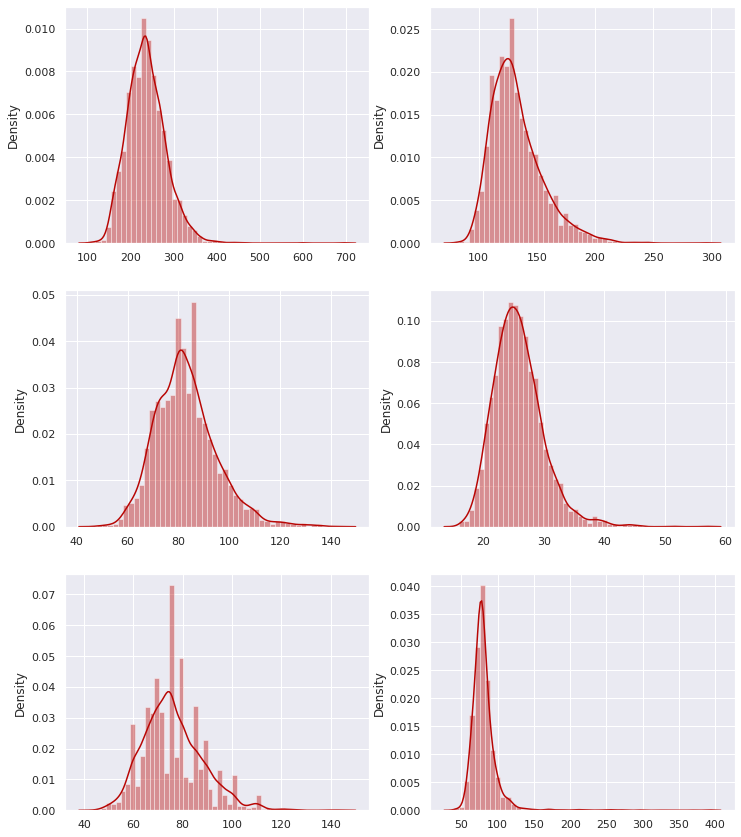

In [59]:
#plotting displot to look for skewness
skewed_column1=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
plt.figure(figsize=(12,20))
for i,j in enumerate(skewed_column1):
  sns.set_palette('OrRd_r')
  plt.subplot(4,2,i+1)
  sns.distplot(x=df2[j])
plt.show()

In [60]:
#log transformation for rightly skewed columns
for i in skewed_column1:
  df3[i]=np.log10(df3[i])


In [61]:
df3.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,2.344392,2.170262,1.929419,1.404492,1.954243,1.903090,1
1,36,1,0,0.0,0.0,0,1,0,2.326336,2.225309,1.991226,1.473779,1.857332,1.875061,0
2,46,0,1,10.0,0.0,0,0,0,2.397940,2.064458,1.851258,1.308564,1.944483,1.973128,0
3,50,1,1,20.0,0.0,0,1,0,2.367356,2.198657,1.944483,1.451172,1.832509,1.973128,1
4,64,0,1,30.0,0.0,0,0,0,2.382017,2.135133,1.929419,1.421933,1.845098,1.886491,0


In [62]:
df4=df3.copy()

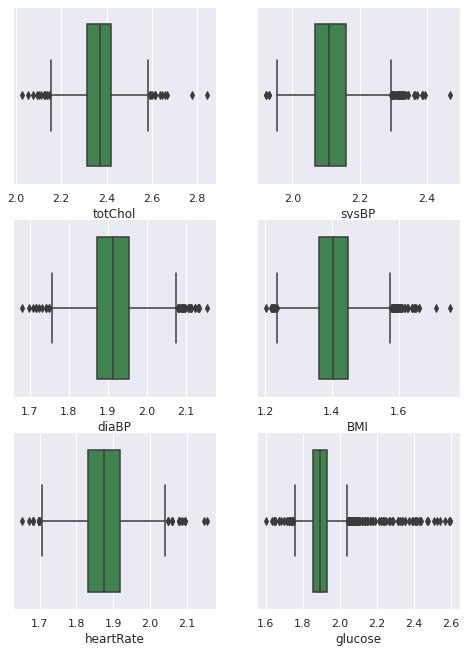

In [63]:
#plotting the boxplot for those columns whioch have continuous values after log transformation.
skewed_column1=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
plt.figure(figsize=(8,15))
for i,j in enumerate(skewed_column1):
  sns.set_palette('PRGn_r')
  plt.subplot(4,2,i+1)
  sns.boxplot(x=df4[j])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

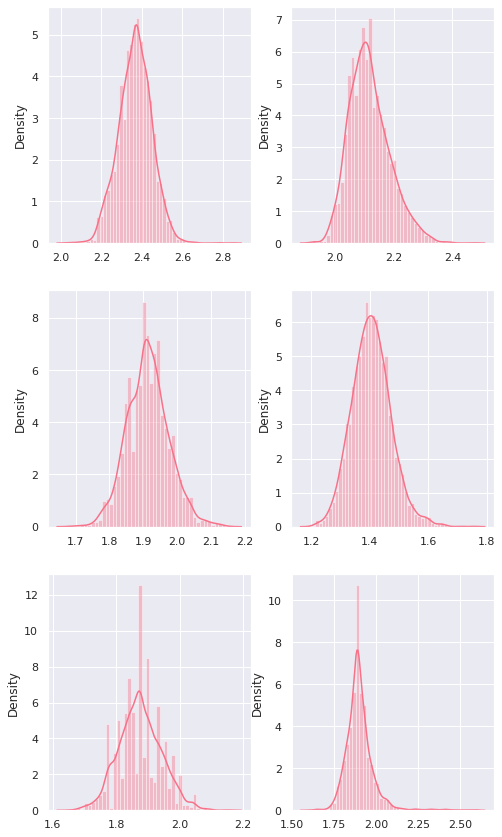

In [64]:
#plotting the distplot for those columns whioch have continuous values after log transformation.
skewed_column1=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
plt.figure(figsize=(8,20))
for i,j in enumerate(skewed_column1):
  sns.set_palette('husl')
  plt.subplot(4,2,i+1)
  sns.distplot(x=df4[j])
plt.show()

<ipython-input-65-cf9c0453fe41>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df4.hist(ax = ax)


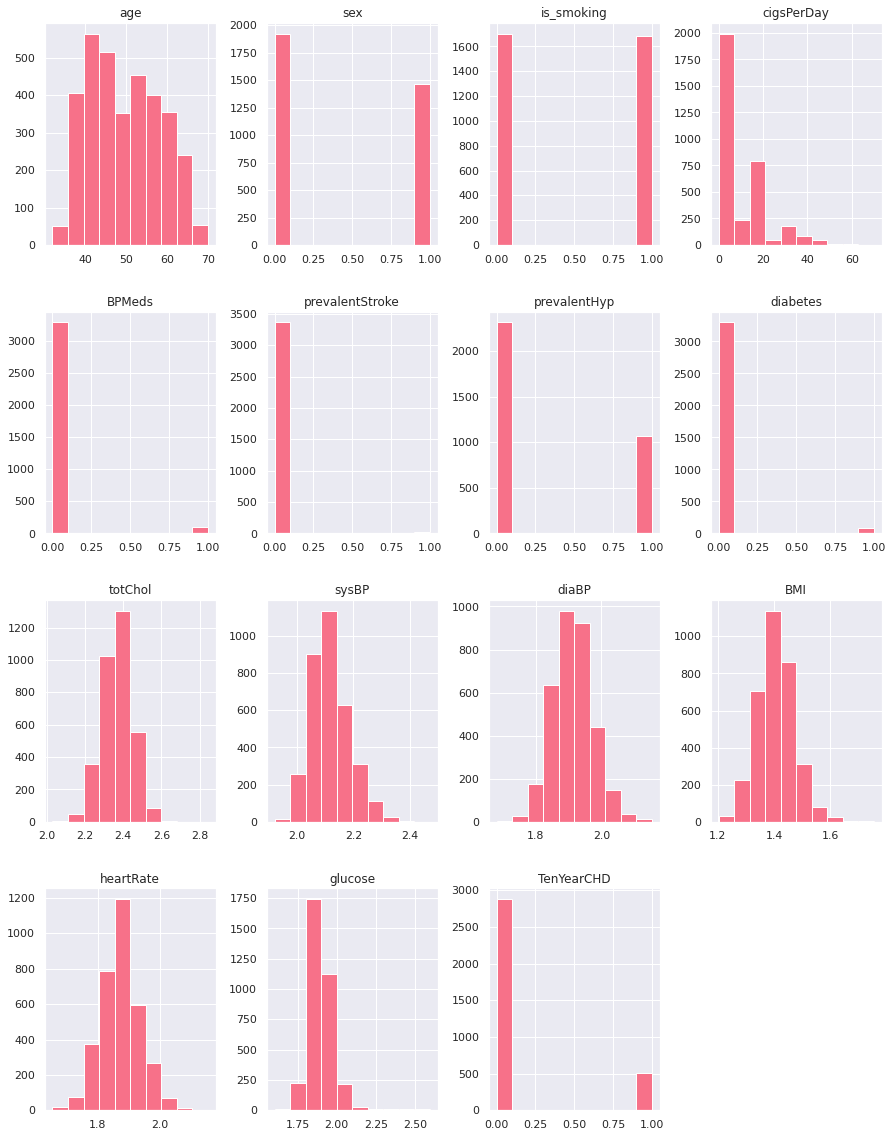

In [65]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df4.hist(ax = ax)
plt.show()

From the above distribution plot it can be observed that there are some columns which are not good indicator of CHD as they have imbalanced data like 'BPMeds',  'prevalentStroke' , 'diabetes'...so its better to drop these columns.

In [66]:
df4['BPMeds'].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [67]:
df4['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [68]:
df4['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

In [69]:
#creating a copy of dataframe
df5=df4.copy()

In [70]:
#dropping irrevelant columns as the data present in it is imbalance which can effect our predictive model
df5.drop(['diabetes','prevalentStroke','BPMeds'],axis=1,inplace=True)

In [71]:
df5.head()

,age,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0,2.344392,2.170262,1.929419,1.404492,1.954243,1.903090,1
1,36,1,0,0.0,1,2.326336,2.225309,1.991226,1.473779,1.857332,1.875061,0
2,46,0,1,10.0,0,2.397940,2.064458,1.851258,1.308564,1.944483,1.973128,0
3,50,1,1,20.0,1,2.367356,2.198657,1.944483,1.451172,1.832509,1.973128,1
4,64,0,1,30.0,0,2.382017,2.135133,1.929419,1.421933,1.845098,1.886491,0


#Handling imbalance in the data of Target Variable.

Well, an imbalance class creates a bias where the machine learning model tends to predict the majority class. You don’t want the prediction model to ignore the minority class.

In [72]:
#checking imbalance in the dataset of target variable
df5['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


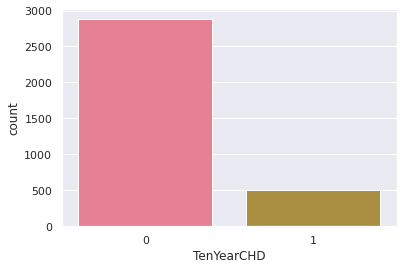

In [73]:
#countplot for those who are prone to CHD and for those who are not prone to CHD
sns.countplot(df5['TenYearCHD'])

#Using Smote to handle imbalance in data

SMOTE works by utilizing a k-nearest neighbour algorithm to create synthetic data. SMOTE first starts by choosing random data from the minority class, then k-nearest neighbors from the data are set. Synthetic data would then be made between the random data and the randomly selected k-nearest neighbor.

The procedure is repeated enough times until the minority class has the same proportion as the majority class.

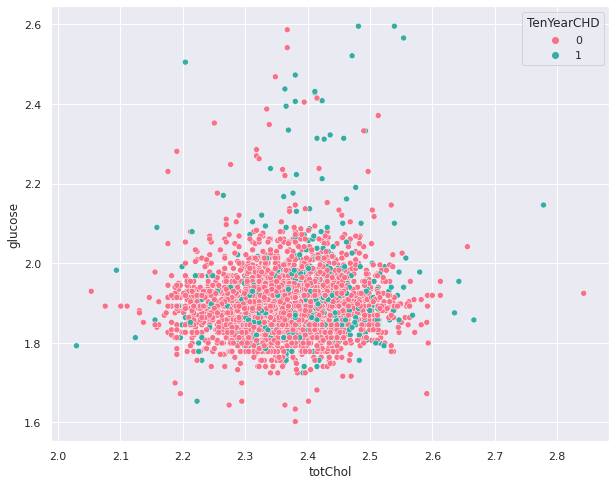

In [74]:
#scatterplot to show the imbalance in the target variable
plt.figure(figsize=(10,8))
sns.scatterplot(x=df5['totChol'],y=df5['glucose'],hue=df5['TenYearCHD'],palette='husl')

We can clearly see that the 0 datapoint of TenYearCHD is dominating over 1 hence we have to resample this through SMOTE.

In [75]:
#using smote to resample the datasets so that it can be balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df5.iloc[:,0:-1], df5['TenYearCHD'])

print('Original dataset shape', len(df5))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


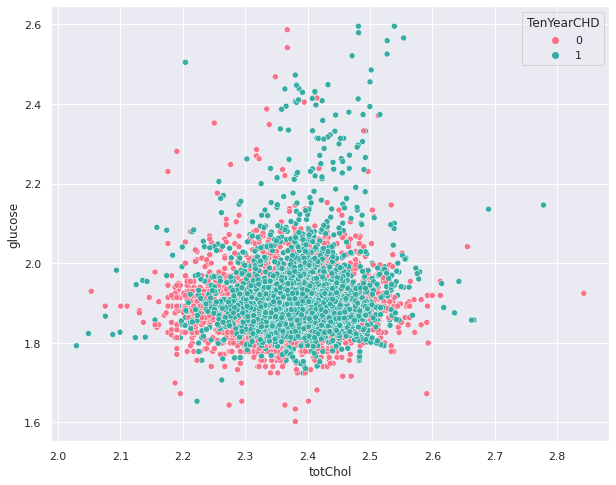

In [76]:
#scatterplot to show that the datasets has been balanced after resampling through smote
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_smote['totChol'],y=x_smote['glucose'],hue=y_smote,palette='husl')

#Standardising the variables using StandardScaler

In [77]:
#standardising the independent variables
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_smote.values)

In [78]:
X_scaled

array([[ 1.46987104, -0.87598055,  0.98005302, ..., -0.08526205,
         1.24791801, -0.0639469 ],
       [-1.76851329,  1.14157786, -1.02035296, ...,  1.00080018,
        -0.3094075 , -0.3767189 ],
       [-0.61194746, -0.87598055,  0.98005302, ..., -1.58890036,
         1.09107928,  0.71760432],
       ...,
       [ 0.66027496, -0.87598055,  0.98005302, ..., -0.81629328,
         0.81848799, -0.0635624 ],
       [ 0.19764862, -0.87598055, -1.02035296, ..., -0.52007911,
         0.84568177, -0.50770752],
       [ 1.0072447 ,  1.14157786, -1.02035296, ..., -0.28454276,
        -1.04559261, -0.54045457]])

#Train Test Split

In [79]:
#splitting the datasets into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_smote,test_size=0.30)

#Applying ML Models

#Logistic Regression

In [80]:
# create and train logistic regression model
logit= LogisticRegression(fit_intercept=True, max_iter=10000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [81]:
#getting the coefficient of each feature
logit.coef_

array([[ 0.53443441,  0.00908992, -0.0295541 ,  0.44317516, -0.3309967 ,
         0.14431849,  0.66352571, -0.00636092,  0.02070462, -0.06668156,
         0.16704884]])

In [82]:
#getting the intercept
logit.intercept_

array([-0.01454404])

In [83]:
#get the predicted probablities
train_pred=logit.predict(X_train)
test_pred=logit.predict(X_test)

In [84]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_pred,y_train)
test_accuracy = accuracy_score(test_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6806451612903226
The accuracy on test data is  0.6556712962962963


In [85]:
logit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

[[577 286]
 [309 556]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

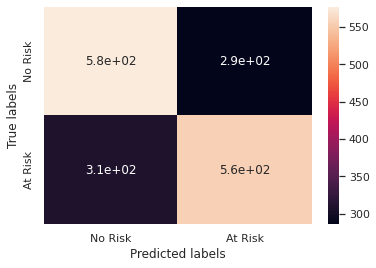

In [86]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
#ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [87]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_pred))
print("\n")
# Print the classification report for  test
print(classification_report(y_test, test_pred))
     

ROCAUC score: 0.6556862403632978


              precision    recall  f1-score   support

           0       0.65      0.67      0.66       863
           1       0.66      0.64      0.65       865

    accuracy                           0.66      1728
   macro avg       0.66      0.66      0.66      1728
weighted avg       0.66      0.66      0.66      1728



Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

In [88]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.602630
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.131      
Dependent Variable: TenYearCHD       AIC:              4879.1995  
Date:               2023-01-17 10:08 BIC:              4948.5162  
No. Observations:   4030             Log-Likelihood:   -2428.6    
Df Model:           10               LL-Null:          -2793.4    
Df Residuals:       4019             LLR p-value:      2.8151e-150
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
---------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1      0.5344      0.0416    12.8420    0.0000     0.4528     0.6159
x2      0.0089      0.0382     0.2317    

From the above result it can be seen that there are some features whose p value is greater than 0.05 ,if we can apply the LogisticRegression model after dropping those columns then our model can be better.But before that lets do GridSearchCV.,i.e. hyperparameter tuning.

**LogisticRegression with hyperparameter tuning.**

In [89]:
#selecting the range for parameters
param_grid=[{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    
    }
]


In [90]:
#creating GridSearchCV and fitting the data into it.
clf=GridSearchCV(logit,param_grid=param_grid,cv=10)
clf.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: 

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}])

In [91]:
#checking the best parameters after hyperparameter tuning
clf.best_params_

{'C': 0.03359818286283781, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [162]:
#creating new logisticregression model with best hyperparameters and fitting the data into it
clf1=LogisticRegression(C=0.03359818286283781,max_iter=100,penalty= 'l1',solver='saga')
clf1.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.03359818286283781, penalty='l1', solver='saga')

In [163]:
#predicting the value for test and train datasets
pred_test_cv=clf1.predict(X_test)
pred_train_cv=clf1.predict(X_train)

In [164]:
#checking accuracy score test datasets
accuracy_score(y_test,pred_test_cv)

0.6197916666666666

In [165]:
#checking accuracy score for train datasets
accuracy_score(y_train,pred_train_cv)

0.6401985111662531

Now Building LogisticRegression model after dropping the columns which have p-values greater than 0.05

In [95]:
#checking the first five rows of dataset after balancing the datasets using smote
df5.head()

,age,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0,2.344392,2.170262,1.929419,1.404492,1.954243,1.903090,1
1,36,1,0,0.0,1,2.326336,2.225309,1.991226,1.473779,1.857332,1.875061,0
2,46,0,1,10.0,0,2.397940,2.064458,1.851258,1.308564,1.944483,1.973128,0
3,50,1,1,20.0,1,2.367356,2.198657,1.944483,1.451172,1.832509,1.973128,1
4,64,0,1,30.0,0,2.382017,2.135133,1.929419,1.421933,1.845098,1.886491,0


In [96]:
#getting those dataframe which has balanced data that is dataframe after performing smote
df6=x_smote.copy()

In [97]:
#checking the shape of the dataframe 
df6.shape

(5758, 11)

In [98]:
#dropping the columns which has greater p values
df6.drop(columns=['sex','is_smoking','BMI','heartRate'],axis=1,inplace=True)

In [99]:
#checking the first five rows
df6.head()

,age,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,glucose
0,64,3.0,0,2.344392,2.170262,1.929419,1.903090
1,36,0.0,1,2.326336,2.225309,1.991226,1.875061
2,46,10.0,0,2.397940,2.064458,1.851258,1.973128
3,50,20.0,1,2.367356,2.198657,1.944483,1.973128
4,64,30.0,0,2.382017,2.135133,1.929419,1.886491


In [100]:
#creating independent variables
x=df6.iloc[:,0:7]

In [101]:
#creating dependent variable
y=y_smote.copy()

In [102]:
y.shape

(5758,)

In [103]:
#standardising the values of independent variables
X=scaler.fit_transform(x)

In [104]:
#splitting the datasets into train and test
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y)

In [105]:
#creating object of LogisticRegression
reg=LogisticRegression()

In [106]:
#training the model
reg.fit(X_train1,y_train1)

LogisticRegression()

In [107]:
#predicting the value of test datasets
pred1=reg.predict(X_test1)

In [108]:
#checking the accuracy by comparing actual value and predicted value
accuracy_score(y_test1,pred1)

0.6618055555555555

In [109]:
#confusion matrix to check true positive or true negative
confusion_matrix(y_test1,pred1)

array([[485, 216],
       [271, 468]])

We can clearly observe the accuracy rate has not increased by a significant amount after dropping the columns.

## **#Decision Tree Classifiers**

In [110]:
#standardised and balanced independent variable datasets
X_tree=x_smote
X_tree

,age,sex,is_smoking,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,0,1,3.000000,0,2.344392,2.170262,1.929419,1.404492,1.954243,1.903090
1,36,1,0,0.000000,1,2.326336,2.225309,1.991226,1.473779,1.857332,1.875061
2,46,0,1,10.000000,0,2.397940,2.064458,1.851258,1.308564,1.944483,1.973128
3,50,1,1,20.000000,1,2.367356,2.198657,1.944483,1.451172,1.832509,1.973128
4,64,0,1,30.000000,0,2.382017,2.135133,1.929419,1.421933,1.845098,1.886491
...,...,...,...,...,...,...,...,...,...,...,...
5753,63,1,1,18.163736,1,2.344866,2.228074,1.877356,1.458217,1.876456,1.968279
5754,41,1,1,20.000000,0,2.375727,2.121523,1.873344,1.467245,1.944678,1.924404
5755,57,0,1,15.000000,0,2.345552,2.068186,1.881156,1.357854,1.927520,1.903124
5756,53,0,0,0.000000,1,2.358523,2.241812,2.028700,1.376752,1.929212,1.863323


In [111]:
#dependent variable
y_tree=y_smote

In [112]:
#splitting the data sets int train and test data sets
X_train,X_test,y_train,y_test=train_test_split(X_tree,y_tree,test_size=0.30)

In [113]:
#creating an object of DecisionTreeClassifier and fitting the data into it
dt_classifier=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=20, random_state=0)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=20, random_state=0)

In [167]:
#predicting the values for x_test and x_train
pred_y_test=dt_classifier.predict(X_test)
pred_y_train=dt_classifier.predict(X_train)

In [115]:
#measuring accuracy score for test datasets
accuracy_score(y_test,pred_y_test)

0.6290509259259259

In [168]:
#measuring accuracy score for train datasets
accuracy_score(y_train,pred_y_train)

0.6930521091811415

[[437 433]
 [208 650]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

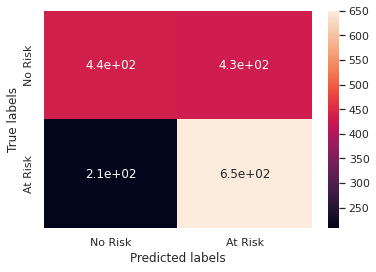

In [116]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, pred_y_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
#ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Visulaizing Decision Tree**

In [117]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

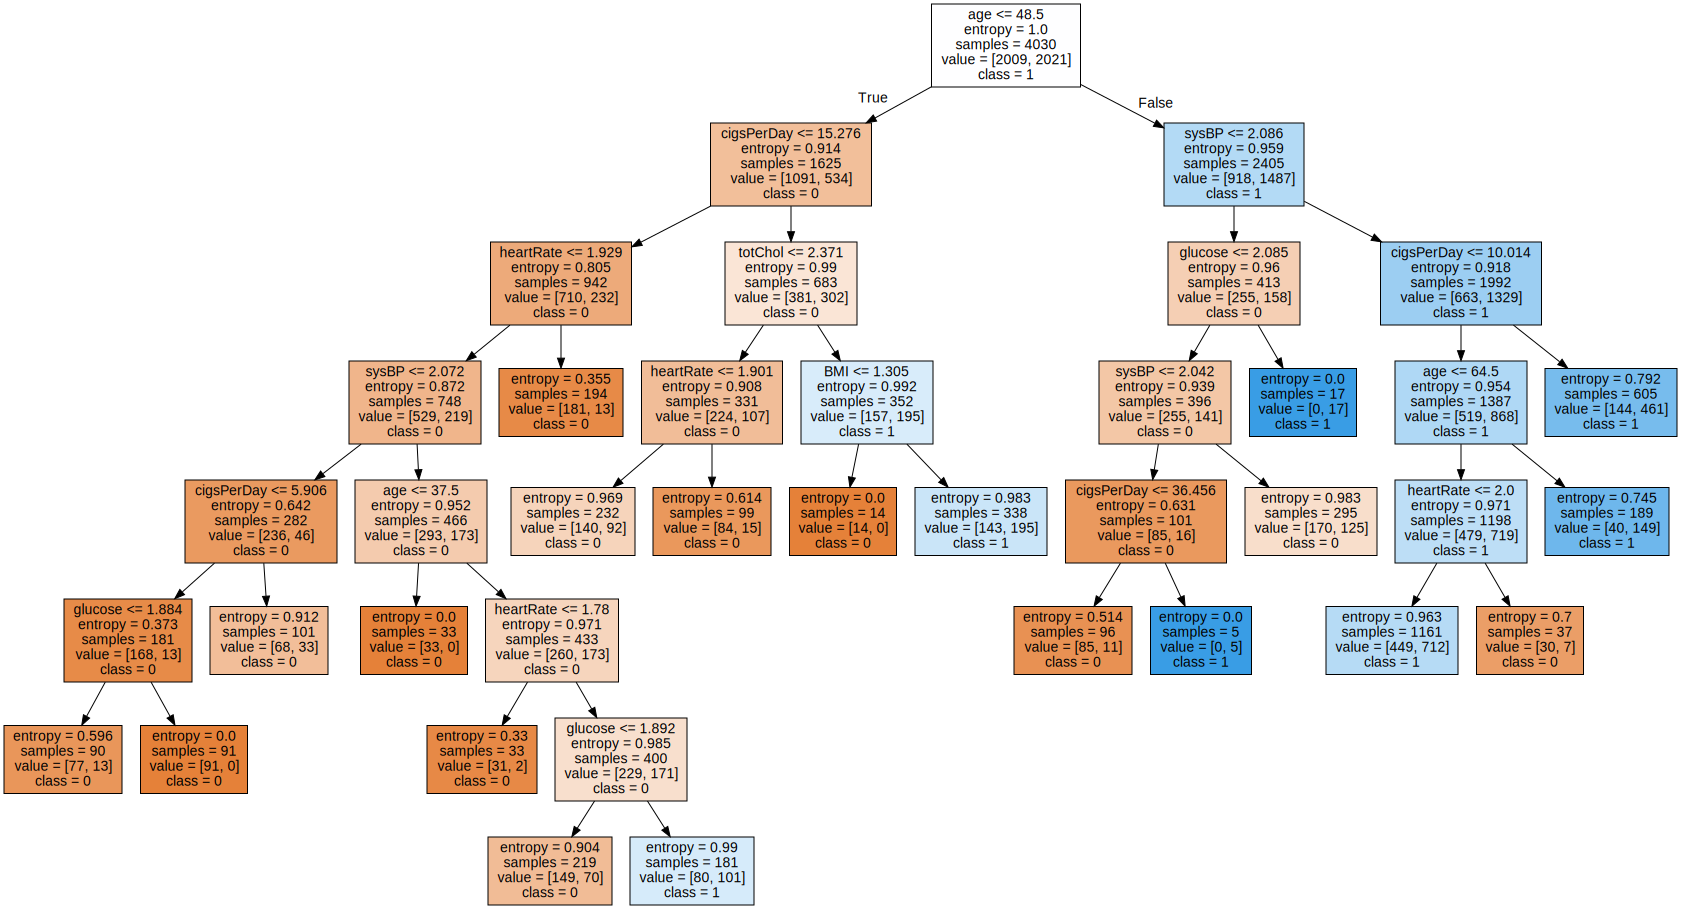

In [118]:
graph = Source(tree.export_graphviz(dt_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## **Decision Tree with Hyperparameter Tuning**

In [119]:
#creating an object of decision tree,setting hyperparameters and doing gridsearchCV
dt_hp = DecisionTreeClassifier(random_state=43)

params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=dt_hp,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

In [120]:
#training the model with datasets
GS.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=43), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [3, 5, 10, 15, 20],
                         'min_samples_split': [8, 10, 12, 18, 20, 16]},
             scoring='accuracy', verbose=True)

In [121]:
#getting best parameters
GS.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 10}

In [122]:
#getting best score
GS.best_score_

0.7208436724565758

In [169]:
#creating object of decision tree with best hyperparameters which we obtained during gridsearchCV
dt_hp1 = DecisionTreeClassifier(criterion='gini',
 max_depth=15,
 min_samples_leaf=3,
 min_samples_split=10,random_state=43)

In [170]:
#training the model with datasets
dt_hp1.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=10,
                       random_state=43)

In [171]:
#predicting for train and test datasets
y_test_pred=dt_hp1.predict(X_test)
y_train_pred=dt_hp1.predict(X_train)

In [172]:
#calculating accuracy score for test datasets
accuracy_score(y_test_pred,y_test)

0.7210648148148148

In [173]:
#calculating accuracy score for train datasets
accuracy_score(y_train_pred,y_train)

0.896029776674938

#Bagging:-
**What Is Ensemble Learning?**

Ensemble learning is a widely used and preferred machine learning technique in which multiple individual models, often called base models, are combined to produce an effective optimal prediction model. The Random Forest algorithm is an example of ensemble learning.


#Random Forest Classifier
Random forest is a commonly-
used machine learning algorithm, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

In [128]:
#creating an object of randon forest classifiers and training the model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [129]:
#predicting for train datasets
rf_predicted_y_train=rf.predict(X_train)

In [130]:
#predicting for test datasets
rf_predicted_y_test=rf.predict(X_test)

In [131]:
#accuracy score for test datasets
accuracy_score(y_test,rf_predicted_y_test)

0.8431712962962963

In [132]:
#accuracy score for train datasets
accuracy_score(y_train,rf_predicted_y_train)

1.0

In [133]:
#printing classification report
print(classification_report(y_test,rf_predicted_y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       870
           1       0.82      0.88      0.85       858

    accuracy                           0.84      1728
   macro avg       0.85      0.84      0.84      1728
weighted avg       0.85      0.84      0.84      1728



In [134]:
#knowing the best parameters used in algorithm
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

[[700 170]
 [101 757]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

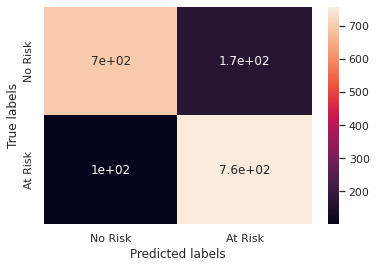

In [135]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, rf_predicted_y_test)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
#ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#Random Forest Classifier with hyperparameter tuning

In [136]:
#random forest with hyperparameters setting
rf1=RandomForestClassifier()
grid_param={'n_estimators':[90,100,115,130],
            'criterion':['gini','entropy'],
            'max_depth':range(2,20,1),
            'min_samples_leaf':range(1,10,1),
            'min_samples_split':range(2,10,1),
            'max_features':['auto','log2']}

In [137]:
#grid_search_rf=GridSearchCV(estimator=rf1,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)
#grid_search_rf.fit(X_train,y_train)

#Boosting Algorithm
Unlike many ML models which focus on high quality prediction done by a single model, boosting algorithms seek to improve the prediction power by training a sequence of weak models, each compensating the weaknesses of its predecessors.

## **#AdaBoost**
AdaBoost is a specific Boosting algorithm developed for classification problems (also called discrete AdaBoost). The weakness is identified by the weak estimator’s error rate:In each iteration, AdaBoost identifies miss-classified data points, increasing their weights (and decrease the weights of correct points, in a sense) so that the next classifier will pay extra attention to get them right.

In [138]:
#importing the algorithm and creating an object of it
from sklearn.ensemble import AdaBoostClassifier
ad_clf=AdaBoostClassifier()

In [139]:
#training the model with datasets
ad_clf.fit(X_train,y_train)

AdaBoostClassifier()

In [140]:
#predicting for train and test datasets
ad_test_pred=ad_clf.predict(X_test)
ad_train_pred=ad_clf.predict(X_train)

In [141]:
#calculating accuracy score for test datasets
accuracy_score(y_test,ad_test_pred)

0.6990740740740741

In [142]:
#calculating accuracy score for train datasets
accuracy_score(y_train,ad_train_pred)

0.7429280397022332

In [143]:
#printing classification report
print(classification_report(y_test,ad_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       870
           1       0.68      0.73      0.71       858

    accuracy                           0.70      1728
   macro avg       0.70      0.70      0.70      1728
weighted avg       0.70      0.70      0.70      1728



In [144]:
#knowing the best parameters used in algorithm
ad_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

[[579 291]
 [229 629]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

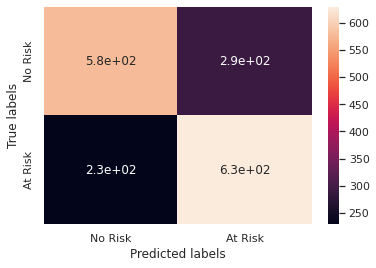

In [145]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, ad_test_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
#ax.set_title('Confusion Matrix for AdaBoost Classifier Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **#XGBoost**
XGBoost is an implementation of Gradient Boosted decision trees.
 
In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems.

In [146]:
#importing XGBoost and creating an object of it.
from xgboost import XGBClassifier
xgb_clf=XGBClassifier()

In [147]:
#training the datasets
xgb_clf.fit(X_train,y_train)

XGBClassifier()

In [148]:
#predicting for train datasets and test datasets
xgb_train_pred=xgb_clf.predict(X_train)
xgb_test_pred=xgb_clf.predict(X_test)

In [149]:
#calculating accuracy score for test datasets
accuracy_score(y_test,xgb_test_pred)

0.7662037037037037

In [150]:
#calculating accuracy score for train datasets
accuracy_score(y_train,xgb_train_pred)

0.8267990074441688

In [151]:
#printing classificatio repport
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       870
           1       0.75      0.79      0.77       858

    accuracy                           0.77      1728
   macro avg       0.77      0.77      0.77      1728
weighted avg       0.77      0.77      0.77      1728



In [152]:
#knowing the best parameters used in model
xgb_clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

[[650 220]
 [184 674]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

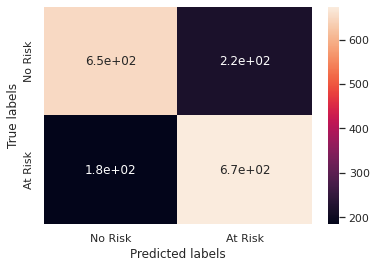

In [153]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, xgb_test_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
#ax.set_title('Confusion Matrix for XGBoost Classifier Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#K-Nearest Neighbors

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.
It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data).

In [154]:
#creating the object of KNN
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [155]:
#Calculating accuracy score for test datasets
accuracy_score(y_test,kn_clf.predict(X_test))

0.7395833333333334

In [174]:
accuracy_score(y_train,kn_clf.predict(X_train))

0.8277915632754342

In [156]:
#printing classification report
print(classification_report(y_test,kn_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.62      0.71       870
           1       0.69      0.86      0.77       858

    accuracy                           0.74      1728
   macro avg       0.75      0.74      0.74      1728
weighted avg       0.75      0.74      0.74      1728



In [157]:
#knowing the best parameters used in model
kn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [158]:
#checking the accuracy score for test datasets for different values of k
for i in range(1,10):
  kn_clf1=KNeighborsClassifier(n_neighbors=i)
  kn_clf1.fit(X_train,y_train)
  kn_clf1.predict(X_test)
  print("the accuracy score for k =",accuracy_score(y_test,kn_clf1.predict(X_test)))


the accuracy score for k = 0.7997685185185185
the accuracy score for k = 0.7754629629629629
the accuracy score for k = 0.7528935185185185
the accuracy score for k = 0.7592592592592593
the accuracy score for k = 0.7395833333333334
the accuracy score for k = 0.7459490740740741
the accuracy score for k = 0.7285879629629629
the accuracy score for k = 0.7361111111111112
the accuracy score for k = 0.7262731481481481


**RESULTS**: Test Accuracies obtained on various ML algorithms: Logistic Regression= 0.6707175925925926, KNN=0.7511574074074074, Decision Tree Classifier()=0.6689814814814815, Random Forest Classifier(at no. of estimators:100)=0.8344907407407407,AdaBoost=0.7384615384615385,XGBoost=0.8429280397022333
Among all XGBoost Classifier has best accuracy rate as it is a boosting algorithm.

# Findings and Applications


**1.**The elderly are more likely to suffer from various types of cardiovascular  diseases.



**2.**Cholesterol level is a very important determinant in leading to cardiovascular diseases. The risks of getting cardiovascular diseases climb significantly when the cholesterol content in human body rises above the normal.


**3.**People with high alcohol consumption have a lower likelihood to have cardiovascular diseases.


**4.**Physical activities help people become less susceptible to cardiovascular diseases.


**5.**A female non-smoker is less likely to have cardiovascular diseases, while a male smoker is less likely to get cardiovascular diseases.


**6.**As long as people have systolic blood pressure ≥ 126, they are classified as those susceptible to cardiovascular diseases. Therefore, high systolic blood pressure plays an important role in predicting that one experiences greater risks of suffering from cardiovascular diseases.


**7.**Among the three splitting factors, two of them are age. This suggests that apart from systolic blood pressure, age is the second most significant factor in deciding whether a person will have a chance of getting cardiovascular disease.

## **#CONCLUSION**

**1.**As age increases the risk of getting diagnosed with heart disease also increases.

**2.**Cigarette consumption is also a major factor that causes CHDs.

**3**.Patients having Diabetes and cholesterol problems show a higher risk of CHDs.

**4.**Patients having high glucose levels are more prone to CHDs.

**5.**Patients with a history of “strokes” have a higher chance of developing CHDs.

**6.**Patients with high BMI(Body Mass Index) are at more risk of getting diagnosed with CHDs.

7.Finally we can say that, XGBoost Classifier has performed best among all the models with the accuracy of 76% & f1-score of 0.71. It is by far the second highest score we have achieved.So,It's safe to say that XGBoost Classifier provides an optimal solution to our problem.